<a href="https://colab.research.google.com/github/davidhood2/Colabs/blob/master/Example_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare Linear and Polynomial Regression

# Import Packages required

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import Data from .csv File

In [0]:
dataset = pd.read_csv('Position_Salaries.csv') #years experience vs salary

X = dataset.iloc[:, 1:-1].values #Take 'Level' only (but as 2D array) 
Y = dataset.iloc[:, -1].values #Take last col only as Y
print(X)
print(Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Train the Linear Regression Model

There is no requirement to encode Position Labels, as they already have 'Levels'

We're not splitting the data into 'testing' and 'training' because we dont need to predict future salaries, but instead calculate an intermediate

In [0]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression() #Instantiate LR model 
lin_reg.fit(X, Y) #Train on whole set for best efforts

X_pred = 6.5 #Looking for a level between 6 and 7
np.set_printoptions(precision=2) #Set to 2 sig fig

# Train the Polynomial Regression Model 

In [0]:
#Training the Polynominal Regression Model 
from sklearn.preprocessing import PolynomialFeatures 
poly_reg = PolynomialFeatures(degree=2) #Start by assuming its a 2nd degree polynomial
X_poly = poly_reg.fit_transform(X,Y)    

lin_reg2 = LinearRegression() #Create new linear regression 
lin_reg2.fit(X_poly, Y) #Train new linear regressor on the polynominal set 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Visualise the Comparative Results

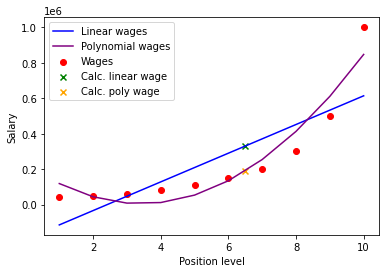

In [0]:
plt.scatter(X,Y,color='red', label = 'Wages')
plt.plot(X, lin_reg.predict(X), color='blue', label = 'Linear wages')
plt.scatter(X_pred, lin_reg.predict([[X_pred]]),color='green',marker='x', label = 'Calc. linear wage') # Calculate our intermediate wage 
plt.xlabel("Position level")
plt.ylabel("Salary")
 
plt.plot(X, lin_reg2.predict(X_poly), color='purple', label = 'Polynomial wages')
plt.scatter(X_pred, lin_reg2.predict([[1,6.5,6.5**2]]),color='orange',marker='x', label = 'Calc. poly wage') # Calculate our intermediate wage 
 
plt.legend()
plt.show() 

# Re-test the Model with Different Polynomial powers 

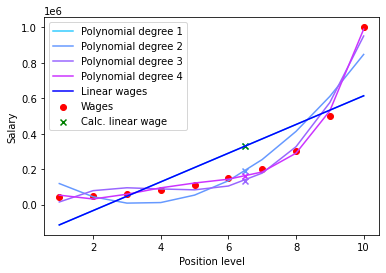

In [0]:

maxI = 5
for i in range(1,maxI):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(X)
    lin_reg2 = LinearRegression()
    lin_reg2.fit(X_poly, Y) 
    plt.scatter(X_pred, lin_reg2.predict([[6.5**j for j in range(0,i+1)]]),color=(i/maxI,1-(i/maxI),1),marker='x') # Calculate our intermediate wage 
    plt.plot(X, lin_reg2.predict(X_poly), color=(i/maxI,1-(i/maxI),1), label = 'Polynomial degree %i' % i)

plt.scatter(X,Y,color='red', label = 'Wages') # 
plt.plot(X, lin_reg.predict(X), color='blue', label = 'Linear wages') 
plt.scatter(X_pred, lin_reg.predict([[X_pred]]),color='green',marker='x', label = 'Calc. linear wage') # Calculate our intermediate wage 

plt.xlabel("Position level")
plt.ylabel("Salary")
plt.legend()
plt.show() 
